<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1> 
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

# 5. Regressão e Regularização de Modelos
Professor(a): Rogério de Oliveira

<br>
<br>

---


# Introdução

Nesta trilha vamos aprender como empregar modelos de redes neurais profundas para fazer regressões e entender algumas técnicas para evitar overfitting e aprimorar o treinamento dos modelos. 

Assim como problemas de classificação a regressão é um problema de **aprendizado supervisionado** e o aprendizado se dá sobre um conjunto de treinamento. É também um **modelo preditivo** em que buscamos, a partir do conjunto de exemplos, fazer a **predição de um valor para novos casos**. Enquanto a classificação busca predizer classes dos dados.

O problema de **overfitting**, ou **sobreajuste**, dos modelos é um problema bastante comum em redes neurais e redes profundas, e que também aparece em outros modelos de aprendizado de máquina. De modo geral ele ocorre quando o modelo tem uma capacidade maior de aprendizado sobre o conjunto de treinamento que sobre o conjunto de validação (ou teste conforme o caso), o quê reduz a capacidade de generalização do modelo. Algumas técnicas, entretanto, podem ser  empregadas para reduzir esse problema em modelos de redes profundas e aprenderemos como aplicar algumas delas aqui, como a técnica de **regularização**.    

# Regressão e Underfitting vs. Overfitting

Antes de seguirmos com modelos de redes profundas vamos entender melhor os modelos de regressão e o problema Underfitting vs. Overfitting.

Como você já deve saber modelos de regressão podem ser lineares ou não lineares. Os modelos não lineares incluem vários tipos de função como funções  polinomiais, exponenciais e também de aprendizado de máquina para realizar a regressão. Os modelos neurais, sendo aproximadores universais de funções (veja a Trilha 1), são então uma ferramenta útil para implementar modelos de regressão. Os modelos também ser de regressão simples ou múltipla, quando consideram várias entradas. 

O exemplo abaixo é do `Scikit-learn`. Um conjunto de pontos tendo como base a função $y = cos(\frac{3 \pi x}{2})$ é aproximado por uma função linear e polinômios de grau 4 e 15. A função linear não é suficiente para ajustar as amostras de treinamento. Temos neste caso um underfitting. O polinômio de grau 4 aproxima a função quase perfeitamente e parece ser um bom modelo. Já o modelo com polinômio de grau 15 superajusta (ou overfitting) os dados de treinamento, aprendendo toda a variância dos dados (incluindo ruído e outliers). Neste caso o modelo, embora tenha capacidade de representar o conjunto de treinamento com menor erro não generaliza e irá prever novos casos de forma pior. 



Automatically created module for IPython interactive environment


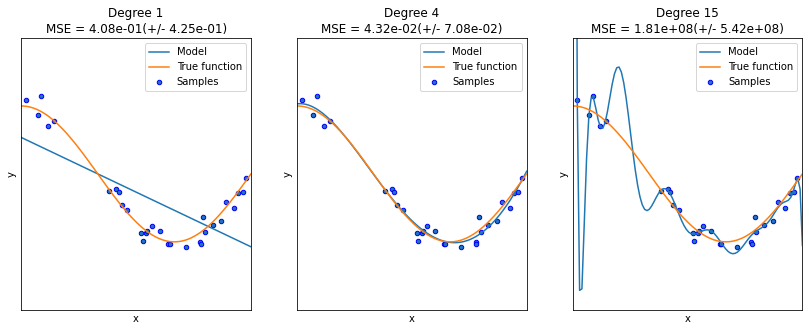

In [ ]:
# fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

O  overfitting/underfitting pode ser avaliado quantitativamente empregando-se a validação cruzada. Nos modelos de classificação empregamos as métricas de  acuracidade ou a entropia cruzada. Já nos modelos de regressão precisamos empregar o erro quadrático médio MSE, 

$$ MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y})^2$$

onde $\hat{y}$ são os valores estimados do modelo para $N$ amostras com saída $y$. Há medidas equivalentes como, 

$$ RMSE = \sqrt{MSE} = \sqrt{ \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y})^2 } $$
e
$$ MAE = \frac{1}{N} \sum_{i=1}^{N}|y_i - \hat{y}|$$

e todas têm a propriedade de apresentarem valores menores para um erro menor do modelo. Não nos deteremos sobre as diferenças dessas medidas. Elas não são importantes aqui e empregaremos na maior parte dos casos o MSE. O importante é você entender que quanto maior o erro (MSE, RMSE ou MAE) no conjunto de validação, menos provável que o modelo generalize corretamente a partir dos dados de treinamento.

$\rightarrow$ O importante é você entender que quanto maior o erro (MSE, RMSE ou MAE) no conjunto de validação, menos provável que o modelo generalize corretamente a partir dos dados de treinamento.

# Regressão com TensorFlow

Podemos empregar redes profundas do mesmo modo que empregamos para classificação para criar modelos de regressão. Vamos empregar aqui os mesmos modelos sequenciais usados na trilha anterior. Do mesmo modo, as entradas da rede irão corresponder às *features*, ou às variáveis preditoras, e nossa saída será sempre de um único neurônio que retornará o valor estimado da regressão. A função de perda, entretanto, será alterada para o MSE.

Nós vamos empregar aqui os mesmos dados do exemplo anterior para criar modelos de regressão simples (uma única variável preditora) para, mais adiante, explorarmos modelos de regressão múltipla.



## Dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras


In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

x = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

## Normalização

Uma boa prática é normalizar os dados. Embora o modelo possa convergir sem a normalização, em geral ela torna o treinamento mais fácil. Neste exemplo vamos adotar a normalização *standard scale* que já empregamos na trilha anterior usando o `Scikit-learn`. Ela leva todos os valores para média zero e desvio padrão 1, e podemos fazer a transformação diretamente transformando os valores em $x' = (x - \bar{x}) / \sigma(x)$,  

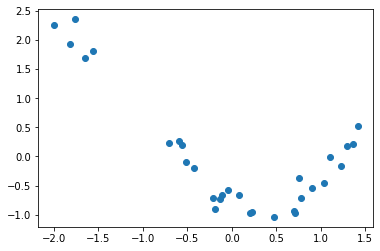

In [ ]:
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

plt.scatter(x,y)
plt.show()

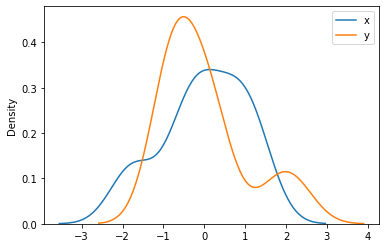

In [ ]:
sns.kdeplot(x,label='x')
sns.kdeplot(y,label='y')
plt.legend()
plt.show()

## Capacidade do modelo

Temos várias possíveis configurações para o nosso modelo e, antes de prosseguirmos, vale a pena entendermos mais sobre a escolha dessas configurações. 

A capacidade de um modelo se refere ao tamanho e à complexidade dos padrões que ele é capaz de aprender. Para modelos neurais isso está diretamente relacionado à quantidade de elementos (neurônios) da rede. Desse modo, se seu modelo não está ajustando corretamente os dados você pode aumentar a capacidade do seu modelo aumentando tornando-a mais ampla (mais elementos nas camadas)  ou tornando-a mais profunda (adicionando camadas). Redes mais amplas em geral são melhores para aprender padrões mais lineares, e redes mais profundas aprendem melhor padrões não lineares. Modelos com mais capacidade, entretanto, podem apresentar overfitting.

$\rightarrow$ Modelos de redes profundas tendem a ser bons em ajustar os dados de treinamento, mas o verdadeiro desafio é a generalização, não o ajuste.

Não existe uma fórmula para determinar o tamanho certo ou a melhor configuração do seu modelo (número de camadas ou o número de elementos em cada camada) e isso precisa ser feito experimentando diferentes configurações. Uma boa prática, entretanto, parece ser começar com modelos relativamente pequenos, com poucas camadas e parâmetros e, aumentando a capacidade do modelo a medida até ver os retornos decrescentes na perda de validação.




## Definição do Modelo

Neste exemplo vamos empregar 3 modelos de diferentes tamanhos começando por um modelo linear. Apesar de estarmos construindo  modelos de regressão, as configurações seguem o mesmo modelo já empregado na trilha anterior para classificação.

In [ ]:
linear = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

wider = tf.keras.Sequential([keras.layers.Dense(units=8, input_shape=[1]),
                             keras.layers.Dense(16,activation='relu'),
                             keras.layers.Dense(1)])

deeper = tf.keras.Sequential([keras.layers.Dense(units=16, input_shape=[1]),
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dense(1)])

print(linear.summary())
print(wider.summary())
print(deeper.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_2"
__________

A função abaixo será útil para verificarmos a curva de aprendizado do modelo. 

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')

  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')

  plt.legend()
  plt.show()



## Compilação e Treinamento do Modelo

Vamos empregar aqui o otimizador padrão do `TensorFlow` (embora pudéssemos usar qualquer outro), e o importante aqui é definirmos uma função de perda adequada para modelos de regressão. Adotamos aqui o MSE e o parâmetro `metrics` é empregado apenas para salvarmos o histórico das métricas indicadas ao longo do treinamento. Não há mudanças com relação aos outros parâmetros que empregamos antes para classificação.


In [ ]:
def train_model(model, epochs=2000):
  model.compile(optimizer='RMSprop', loss='mse', metrics=['mae', 'mse'], )
  history = model.fit(x, y, epochs=epochs, verbose=False, validation_split = 0.2)
  plot_history(history)
  return history

### Modelo Linear

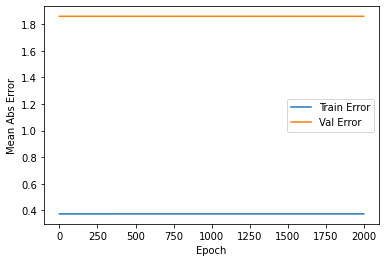

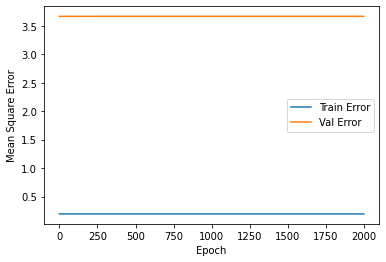

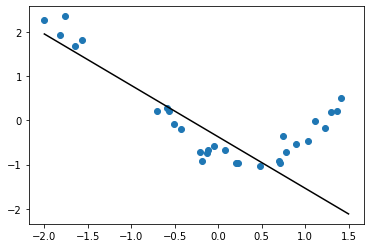

In [ ]:
train_model(linear, epochs=2000)

x_pred = np.linspace(-2,1.5,100)
y_pred = linear.predict(x_pred)[:,0]
plt.scatter(x,y)
sns.lineplot(x=x_pred,y=y_pred,color='k')
plt.show()


Este é um modelo linear e os dois coeficientes obtidos se aproximam do que você obteria com um modelo de regressão linear obtido pelo cálculo dos coeficientes ou um método de mínimos quadrados.

In [ ]:
linear.weights

[<tf.Variable 'dense_8/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.162512]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32, numpy=array([-0.3713722], dtype=float32)>]

In [ ]:
a = linear.weights[0].numpy()[0][0].round(2)
b = linear.weights[1].numpy()[0].round(2)
exp = '\hat{y} = ' + str(a) + 'x' + str(b) 
display(Math(exp))

<IPython.core.display.Math object>

Esse modelo, entretanto, não ajusta suficientemente os dados (underfitting) e precisamos aumentar a capacidade do modelo. 

### Modelo Wider

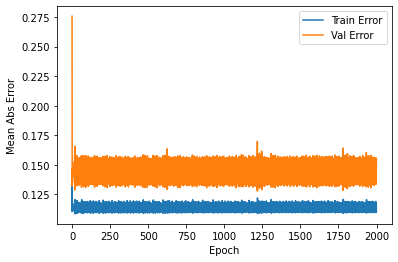

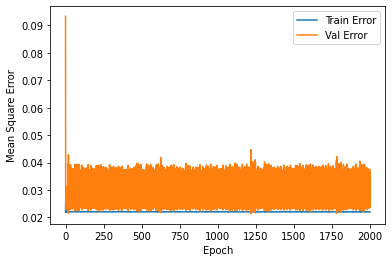

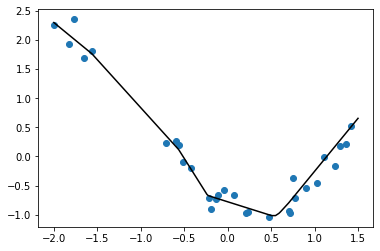

In [ ]:
train_model(wider, epochs=2000)

x_pred = np.linspace(-2,1.5,1000)
y_pred = wider.predict(x_pred)[:,0]
plt.scatter(x,y)
sns.lineplot(x=x_pred,y=y_pred,color='k')
plt.show()

Esse modelo, à exemplo do ajuste com um polinômio de grau 4, já se ajusta bastante melhor aos dados.

### Modelo Deeper

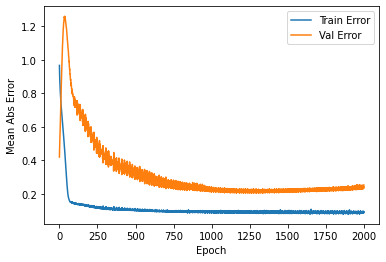

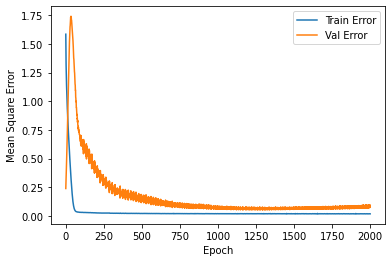

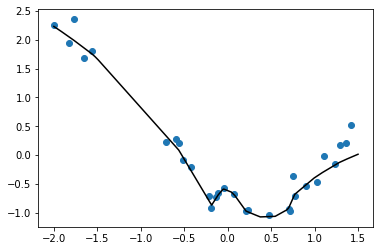

In [ ]:
train_model(deeper, epochs=2000)

x_pred = np.linspace(-2,1.5,1000)
y_pred = deeper.predict(x_pred)[:,0]
plt.scatter(x,y)
sns.lineplot(x=x_pred,y=y_pred,color='k')
plt.show()

Aqui, como você pode observar o modelo se ajustar mais perfeitamente os dados, mas ele aprende também *toda* a variância dos dados e generaliza, portanto, de maneira pior. É um modelo com sobreajuste ou overfitting.

# Tratando o Overfitting

Existem algumas técnicas comumente empregadas para reduzir ou minimizar o overfitting dos modelos de redes profundas:

- Alterando a amostra de dados
- Parada antecipada ou *Early Stopping* 
- *Dropout*
- Regularização

Alterar a amostra de dados pode envolver o aumento dos dados, como mais coletas ou técnicas estatísticas de produção de novos dados a partir dos originais, ou ainda técnicas de validação cruzada. Essas são técnicas bastante gerais, aplicáveis a quaisquer outros modelos supervisionados e não abordaremos aqui. As demais vamos aplicar aqui no nosso exemplo, e existem ainda outras técnicas que não trataremos, com a ingestão de ruído nos dados.



## Early Stopping

Já empregamos o Early Stopping na trilha anterior e, aqui, ele pode ser feito do mesmo modo. A ideia é de que o erro sobre o conjunto de validação pode aumentar ou não reduzir na mesma taxa que o erro sobre o conjunto de treinamento e uma parada antecipada do treinamento pode evitar que essa divergência cresça.

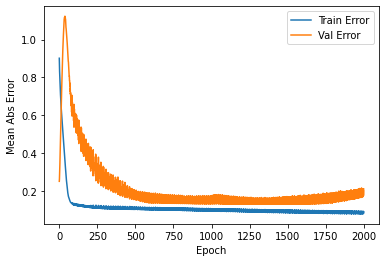

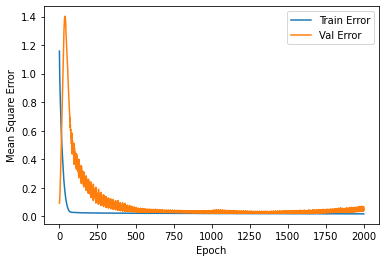

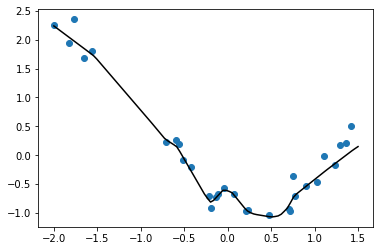

In [ ]:
deeper = tf.keras.Sequential([keras.layers.Dense(units=16, input_shape=[1]), # necessário para reinicializar os parâmetros do modelo
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dense(1)])

train_model(deeper, epochs=2000)

x_pred = np.linspace(-2,1.5,100)
y_pred = deeper.predict(x_pred)[:,0]
plt.scatter(x,y)
sns.lineplot(x=x_pred,y=y_pred,color='k')
plt.show()

Você pode notar a partir de 600 iterações o modelo já não apresenta grandes melhoras no aprendizado do conjunto de validação e a partir de 1300 os erros passam até mesmo a crescer. Aplicamos então a parada antecipada seguindo o mesmo modo empregado na trilha anterior para classificação dos dados. 

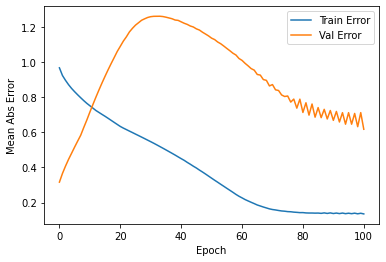

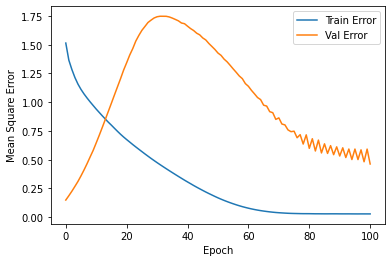

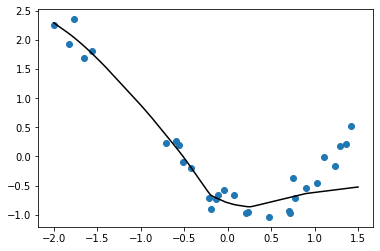

In [ ]:
deeper = tf.keras.Sequential([keras.layers.Dense(units=16, input_shape=[1]), # necessário para reinicializar os parâmetros do modelo
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dense(1)])

early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.1
)

def train_model(model, epochs=2000):
  model.compile(optimizer='RMSprop', loss='mse', metrics=['mae', 'mse'], )
  history = model.fit(x, y, epochs=epochs, verbose=False, validation_split = 0.2, callbacks=early_stopping)
  plot_history(history)
  return history 

train_model(deeper, epochs=2000)

x_pred = np.linspace(-2,1.5,100)
y_pred = deeper.predict(x_pred)[:,0]
plt.scatter(x,y)
sns.lineplot(x=x_pred,y=y_pred,color='k')
plt.show()

O modelo agora passa a não exibir mais overfitting. É claro que poderíamos ter feito isso reduzindo a capacidade do modelo e que a generalização obtida aqui não representa de modo totalmente adequado os dados. Mas este é um exemplo com muitos poucos dados. Nosso propósito aqui é apenas o de apresentar as técnicas de tratamento de overfitting e modelos melhores já foram obtidos aqui antes, e poderiam ser até melhorados. 

## Dropout

Outra técnica comumente empregada em modelos de redes profundas é a técnica de `Dropout` ou de *Abandono* do treinamento. O abandono é uma das técnicas de regularização mais eficazes e mais comumente usadas para redes neurais, desenvolvida por Hinton e seus alunos. 

O dropout consiste em 'eliminar' aleatoriamente algumas entradas de uma camada de neurônios, isto é, atribuir valor zero, durante o treinamento. Com isso a camada 'perde' ou 'esquece' parte do treinamento das camadas anteriores. Intuitivamente, os neurônios não poderão mais contar totalmente com a saída dos neurônios anteriores e, portanto, precisará produzir parâmetros que sejam úteis por conta própria. A "taxa de abandono" é a fração dos recursos ou entradas que estão sendo zerados (geralmente valores entre 0.2 e 0.5). 

As camadas de dropout são aplicadas à saída da camada da camada anterior. Vamos aplicar ao nosso modelo `deeper` e então ver o resultado.

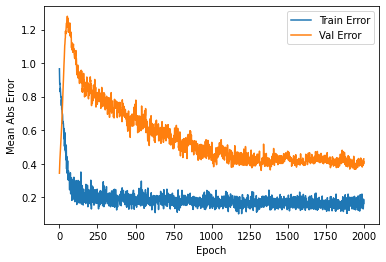

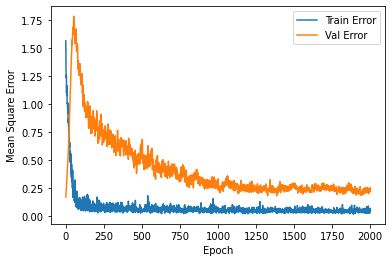

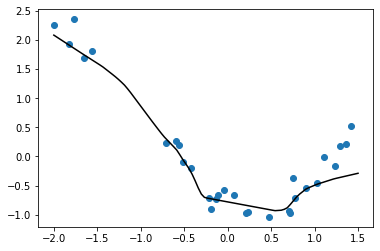

In [ ]:
deeper = tf.keras.Sequential([keras.layers.Dense(units=16, input_shape=[1]), # necessário para reinicializar os parâmetros do modelo
                             keras.layers.Dropout(0.1),
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dropout(0.1),
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dropout(0.1), 
                             keras.layers.Dense(1)])

def train_model(model, epochs=2000):
  model.compile(optimizer='RMSprop', loss='mse', metrics=['mae', 'mse'], )
  history = model.fit(x, y, epochs=epochs, verbose=False, validation_split = 0.2)
  plot_history(history)
  return history 

train_model(deeper, epochs=2000)

x_pred = np.linspace(-2,1.5,100)
y_pred = deeper.predict(x_pred)[:,0]
plt.scatter(x,y)
sns.lineplot(x=x_pred,y=y_pred,color='k')
plt.show()

Mais uma vez o modelo obtido parece apresentar mais generalização e a técnica elimina o sobreajuste do modelo. É claro também que essa técnica pode ser ainda aplicada em conjunto com técnica de Early Stopping, assim como as demais técnicas que veremos. 

# Regularização

A próxima técnica é de regularização. Mas antes, vamos entender o que essa técnica significa pois, diferente das técnicas anteriores, ela também se aplica outros modelos de aprendizado supervisionado. 

Vamos retomar o exemplo do `Scikit-learn` e a aproximação do conjunto de dados pelos polinômios de grau 1, 4 e 15. Fazemos a aproximação aqui com a função `polyfit` do `NumPy`, apenas para obter os coeficientes dos polinômios (o resultado é praticamente o mesmo do `Scikit-learn`). 

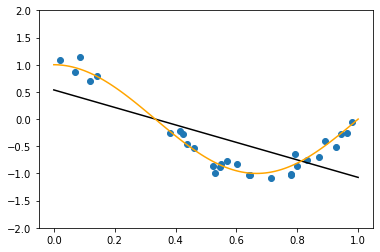

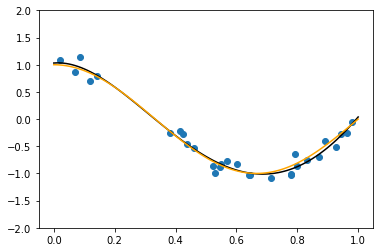

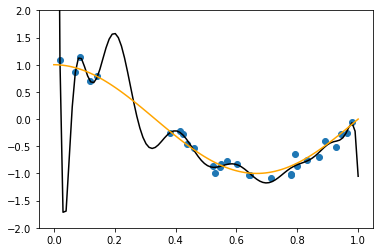

In [ ]:
import seaborn as sns

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polim = []

for i in [1, 4, 15]:
  z = np.polyfit(x, y, i)
  p = np.poly1d(z)
  polim.append(p)

  plt.scatter(x,y)
  xr = np.linspace(0,1,100)
  sns.lineplot(x=xr,y=p(xr),color='k')
  sns.lineplot(x=xr,y=true_fun(xr),color='orange')
  plt.ylim([-2,2])
  plt.show()

In [ ]:
from IPython.display import display, Math

for p in polim:
  coefs = p.coefficients.round(2)
  exp = ''
  for i, coef in enumerate(coefs):
    exp = exp + str(coef) + 'x^{' + str(len(coefs) - (i +1)) + '}'
    if i != len(coefs) - 1:
      exp = exp + '+'
  print('\n')
  display(Math(exp))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

O que você nota nesses coeficientes? É isso mesmo. Os coeficientes do último modelo têm uma ordem de grandeza muito maior! Não detalharemos as razões disso aqui, mas o fato é que modelos com sobreajuste se caracterizam pode coeficientes com ordem de grandeza cada vez maior. 

A ideia da regularização é, então, 'regular' o tamanho dos parâmetros do modelo, os pesos da rede ou os coeficientes do modelo, buscando desse modo coeficientes menores e menor sobreajuste. 

Uma forma de se fazer isso é alterando a função de perda para 'penalizar' o uso de coeficientes maiores, isto é, maiores pesos criam uma perda adicional no valor da função de custo e, com isso, prevenimos os valores maiores dos coeficientes. Considerando nossa função de perda o MSE:

$$ loss = error + \lambda \theta(W) $$

Onde $\lambda \theta(W)$ é o termo que penaliza o erro em função dos coeficientes do modelo com peso $\lambda$.



## **L1** ou *LASSO* Regularization

No esquema de regularização L1 ou *LASSO* (Least Absolute Shrinkage and Selection Operator) a penalização se dá aplicando a norma L1 dos pesos:

$$ loss_{L1} = error + \lambda \sum_{i=1}^{n} |w_i| $$

## **L2** ou *Ridge* Regularization

No esquema de regularização L2, de forma análoga, aplicamos a norma L2 dos pesos:

$$ loss_{L2} = error + \lambda \sum_{i=1}^{n} w_i^2  $$

E podemos combinar ainda os dois modos de regularização.

Essas formas de regularizaçãp pode ser igualmente empregados para modelos de classificação. Mas há técnicas de regularização com base na Entropia (Entropy Regularization) para modelos que retornam probabilidades de classe e você pode ainda customizar suas próprias funções de regularização.



## TensorFlow Regularization

Vamos então voltar e ver como podemos aplicar a regularização do nosso modelo com o `TensorFlow`.



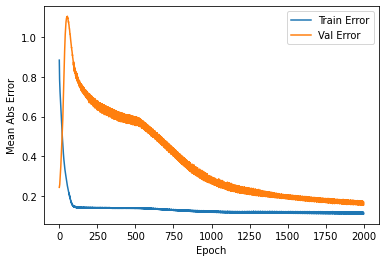

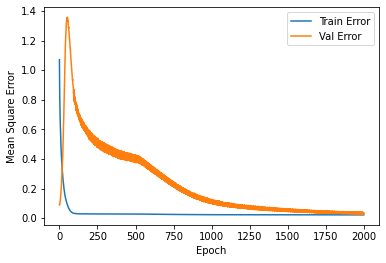

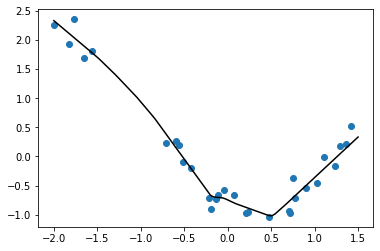

In [ ]:
x = (x - x.mean()) / x.std() # Voltamos a fazer a normalização dos dados pois foram regerados na seção anterior
y = (y - y.mean()) / y.std()

from tensorflow.keras import regularizers

deeper = tf.keras.Sequential([keras.layers.Dense(units=16, input_shape=[1],
                                                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)), 
                             keras.layers.Dense(32,activation='relu',
                                                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)),
                             keras.layers.Dense(32,activation='relu',
                                                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)),
                             keras.layers.Dense(1)])

def train_model(model, epochs=2000):
  model.compile(optimizer='RMSprop', loss='mse', metrics=['mae', 'mse'], )
  history = model.fit(x, y, epochs=epochs, verbose=False, validation_split = 0.2)
  plot_history(history)
  return history 

train_model(deeper, epochs=2000)

x_pred = np.linspace(-2,1.5,100)
y_pred = deeper.predict(x_pred)[:,0]
plt.scatter(x,y)
sns.lineplot(x=x_pred,y=y_pred,color='k')
plt.show()

O resultado parece bastante bom não? 

A regularização é adicionada ao modelo na definição das camadas. Do mesmo modo que empregamos a regularização conjunta `L1_L2`, há o regularizador `L1` e o regularizador `L2` que podem ser aplicados individualmente. Aqui empregamos o parâmetro `kernel_regularizer` mas outros modos no `Keras` como a regularização do bias ou das saídas, mas aqui já temos o suficiente e casos específicos de aplicação é importante que você consulte a documentação do `Keras`. 

# Colocando tudo junto

Vamos aplicar as técnicas acima para um conjunto de dados maior e fazer agora uma regressão múltipla. Como você verá a adaptação do modelo será bastante direta e praticamente precisamos apenas ajustar o modelo para receber novas entradas. 

## Dados

Vamos empregar o conjunto de dados `mpg` do pacote `Seaborn` e estimar o consumo de combustível com base nos demais parâmetros.

In [ ]:
df = sns.load_dataset('mpg')
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Preparação dos dados

Vamos eliminar dados nulos da base e fazer o hot encode dos atributos não numéricos. O atributo *name* não faz aqui sentido ser empregado e será eliminado. 

In [ ]:
print(df.isna().sum().sum())
df = df.dropna() 

6


In [ ]:
df = pd.concat( [ df.drop(columns=['origin','name']) , pd.get_dummies(df.origin) ] , axis=1 )
display(df.head())


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


Podemos então normalizar os dados e separarmos as variáveis preditoras e objetivo.

In [ ]:
from sklearn.preprocessing import scale

x = scale(df.drop(columns='mpg'))
y = scale(df.mpg)

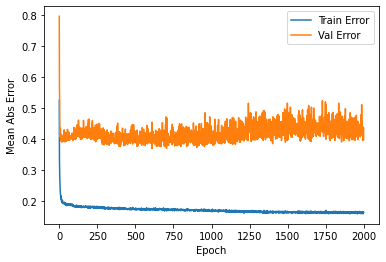

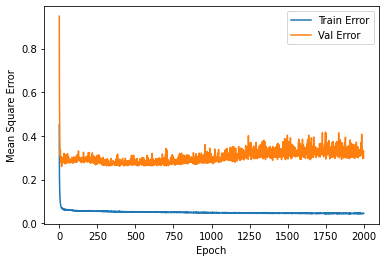

In [ ]:
deeper = tf.keras.Sequential([keras.layers.Dense(units=16, input_shape=[x.shape[1]],
                                                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)), 
                             keras.layers.Dense(32,activation='relu',
                                                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)),
                             keras.layers.Dense(32,activation='relu',
                                                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)),
                             keras.layers.Dense(1)])

def train_model(model, epochs=2000):
  model.compile(optimizer='RMSprop', loss='mse', metrics=['mae', 'mse'], )
  history = model.fit(x, y, epochs=epochs, verbose=False, validation_split = 0.2)
  plot_history(history)
  return history 

train_model(deeper, epochs=2000)


E como você pode ver o modelo aproxima bastante bem os dados quando comparamos os valores de $y$ e os valores estimados $\hat{y}$, tendo o erro uma distribuição normal em torno no zero.

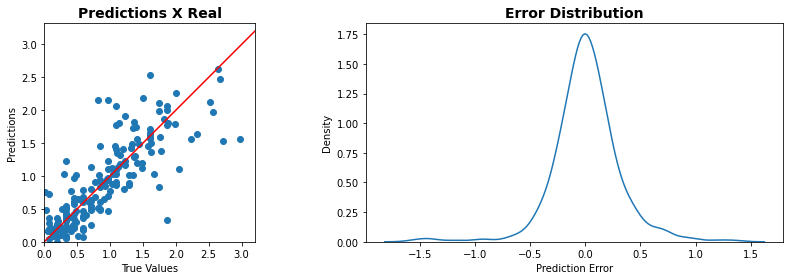

In [ ]:
plt.figure(figsize=(12,4))
    
y_pred = deeper.predict(x)[:,0]

plt.subplot(1,2,1)
plt.scatter(y,y_pred)
plt.title('Predictions X Real', fontsize=14, weight='bold')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-6, 6], [-6, 6],c='r')

plt.subplot(1,2,2)
error = y_pred - y
sns.kdeplot(error)
plt.xlabel("Prediction Error")
plt.title('Error Distribution', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# Síntese

Nesta trilha você aprendeu como empregar redes profundas para criar modelos de regressão simples e múltipla usando o `TensorFlow`. 

Apresentamos também algumas técnicas comumente empregadas para reduzir ou minimizar o overfitting dos modelos de redes profundas como, o *Early Stopping*, o *Dropout* e as técnicas de Regularização *L1* e *L2*. Embora tenhamos aplicado essas técnicas para modelos de regressão elas são igualmente aplicáveis para modelos de classificação. Embora com resultados e interpretação diferentes, na prática, há pouca diferença entre construir modelos de regressão ou os de classificação que vimos na trilha anterior, tendo a diferença ficado sobretudo na troca da função de perda na configuração das entradas e saídas modelo.

Uma nota importante sobre esses modelos é que aqui nós restringimos aos modelos de regressão e é bastante comum a tentativa de aplicar esses modelos à séries temporais dados (dados da bolsa por exemplo) buscando fazer predições desses dados. Séries temporais, entretanto, têm uma série de complexidades, como a dependência de valores anteriores, periodicidade etc., que não são bem capturadas por modelos de regressão havendo técnicas mais elaboradas para isso. No campo dos modelos de redes profundas as redes recorrentes são, neste caso, mais adequadas e serão vistas em outra componente mais adiante. 

Há muitos outros pontos a serem explorados sobre o ajuste desses modelos e deixamos alguns deles indicados nas referências e sugestões de consulta adicionais.




## Para saber mais

Acesse **Noções básicas ML com Keras** em https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br as seções de* Regressão* e *Overfit e Underfit*. Lá você poderá ver exemplos bastante próximos do que fizemos aqui.

Se você estiver interessado em técnicas para o ajuste de hiperparâmetros de uma rede com o `TensorFlow` você pode começar acessando  **Noções básicas ML com Keras** em https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br na seção *Ajustar hiperparâmetros com o Keras Tuner*, e conhecer essa ferramenta para busca de melhores hiperparâmetros da sua rede.

Conheça também a técnica de **Batch Normalization** que não tratamos aqui em 
**Intro to Deep Learning: 5 of 6**, disponível em: https://www.kaggle.com/ryanholbrook/dropout-and-batch-normalization. Se a normalização ajuda no aprendizado, o que falar de aplicarmos a normalização ao longo do treinamento da rede?




## Referências

1. Aston Zhang and Zachary C. Lipton and Mu Li and Alexander J. Smola. **Dive into Deep Learning** (2020). Disponível em: https://d2l.ai/index.html Acesso em: 21 de abril de 2021. 

1. ___. **Noções básicas sobre Keras**. Disponível em: https://www.tensorflow.org/tutorials?hl=pt-br  Acesso em: 09 de junho de 2021.

1. ___.**Keras: Layer weight regularizers**. Disponível em: https://keras.io/api/layers/regularizers/, Acesso em: 09 de junho de 2021.

1. ___.**Intro to Deep Learning**. Disponível em: https://www.kaggle.com/learn/intro-to-deep-learning, Acesso em: 09 de junho de 2021.

1. ___.**Underfitting vs. Overfitting **. Disponível em: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py, Acesso em: 09 de junho de 2021.


